In [1]:
import cartopy.feature as cft
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import matplotlib
#matplotlib.use('qtagg')
import xarray as xr
import glob
import numpy as np
import pandas as pd
from netCDF4 import Dataset
#import IPython.display
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cft
#import cosima_cookbook as cc
#import cosima-cookbook as cc
from matplotlib.colors import SymLogNorm
import matplotlib.ticker as ticker

#from mpl_toolkits.basemap import Basemap
#import basemap as bs
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
import math
import time
import sys

In [6]:
grid_1deg

<xarray.Dataset>
Dimensions:  (ny: 300, nx: 360)
Dimensions without coordinates: ny, nx
Data variables:
    angle    (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    anglet   (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    hte      (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    htn      (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    hue      (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    hun      (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    tarea    (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    tlat     (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    tlon     (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    uarea    (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    ulat     (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    ulon     (ny, nx) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
Attributes:
    history:  Thu Jun 30 14:57:36 2022: ncrename -v angleT,anglet icegrid_non...
    NCO:      netCDF Operators version 5.0.7 (Homepage = http://nco.sf.net, C...

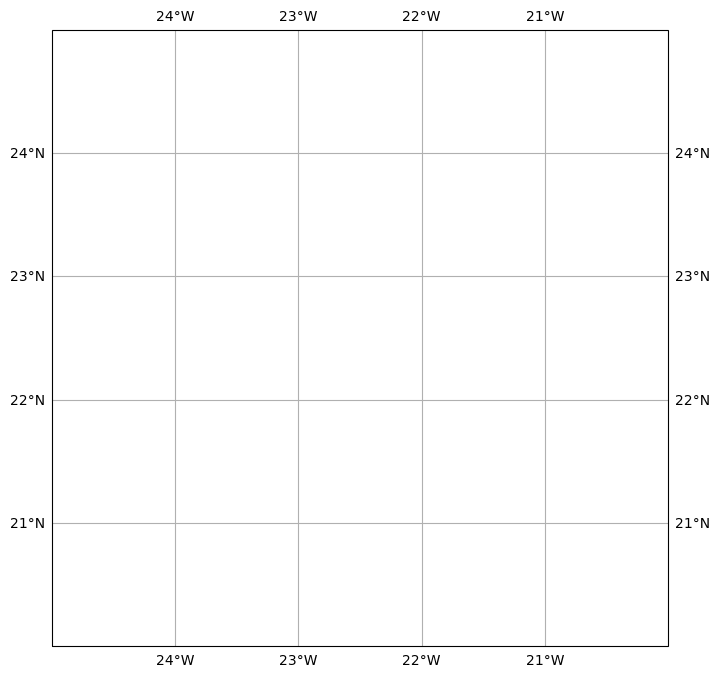

In [133]:
grid_1deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_10/icegrid_nonc.nc')
grid_025deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_025/icegrid.nc')


#projection = ccrs.Orthographic(central_latitude=80, central_longitude=50)
fig = plt.figure(figsize=[10, 8])
#ax = plt.axes(projection=projection)
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-20, -25, 20, 25], crs=ccrs.PlateCarree())
# Set the extent to focus on the Gulf Stream region


# Function to plot grid
def plot_grid(ax, grid, color, linestyle, alpha):
    lat = grid['ulat'] * 180 / np.pi  # Convert to degrees
    lon = grid['ulon'] * 180 / np.pi  # Convert to degrees
    for i in range(lat.shape[0]):
        ax.plot(lon[i, :], lat[i, :], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())
    for j in range(lon.shape[1]):
        ax.plot(lon[:, j], lat[:, j], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())

# Plot 1-degree grid
plot_grid(ax, grid_1deg, 'red', '-', 1.0)

# Plot 0.25-degree grid
plot_grid(ax, grid_025deg, 'blue', '--', 0.5)


# Optional: Add coastlines and gridlines for better context
ax1.coastlines()
ax1.gridlines(draw_labels=True)

plt.show()

/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


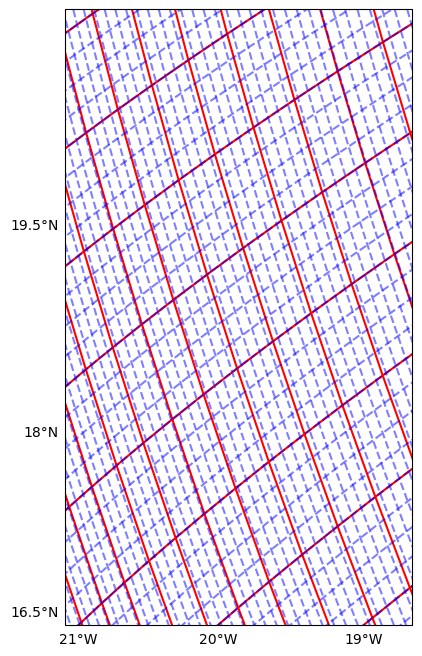

In [132]:

# Load datasets
grid_1deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_10/icegrid_nonc.nc')
grid_025deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_025/icegrid.nc')

# Define projection
projection = ccrs.Orthographic(central_latitude=80, central_longitude=50)
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent([-20, -25, 20, 25], crs=ccrs.PlateCarree())

# Function to plot grid
def plot_grid(ax, grid, color, linestyle, alpha):
    lat = grid['ulat'] * 180 / np.pi  # Convert to degrees
    lon = grid['ulon'] * 180 / np.pi  # Convert to degrees
    for i in range(lat.shape[0]):
        ax.plot(lon[i, :], lat[i, :], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())
    for j in range(lon.shape[1]):
        ax.plot(lon[:, j], lat[:, j], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())

# Plot 1-degree grid
plot_grid(ax, grid_1deg, 'red', '-', 1.0)

# Plot 0.25-degree grid
plot_grid(ax, grid_025deg, 'blue', '--', 0.5)

# Add coastlines and gridlines
ax.coastlines()
#ax.gridlines(draw_labels=True)
# Customize gridliner
gl = ax.gridlines(draw_labels=True, alpha=0.0)  # Set gridlines invisible
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}


plt.show()

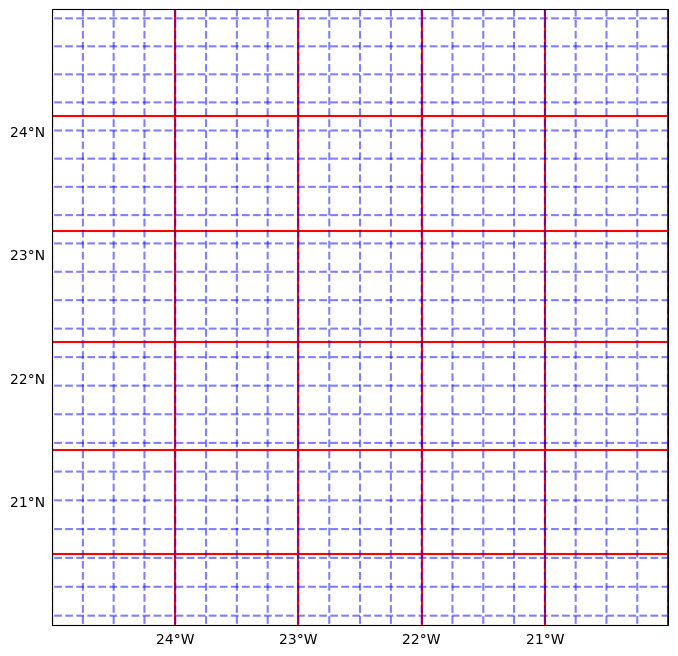

In [134]:

# Load datasets
grid_1deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_10/icegrid_nonc.nc')
grid_025deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_025/icegrid.nc')

# Define projection
projection = ccrs.Orthographic(central_latitude=80, central_longitude=50)
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, -25, 20, 25], crs=ccrs.PlateCarree())

# Function to plot grid
def plot_grid(ax, grid, color, linestyle, alpha):
    lat = grid['ulat'] * 180 / np.pi  # Convert to degrees
    lon = grid['ulon'] * 180 / np.pi  # Convert to degrees
    for i in range(lat.shape[0]):
        ax.plot(lon[i, :], lat[i, :], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())
    for j in range(lon.shape[1]):
        ax.plot(lon[:, j], lat[:, j], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())

# Plot 1-degree grid
plot_grid(ax, grid_1deg, 'red', '-', 1.0)

# Plot 0.25-degree grid
plot_grid(ax, grid_025deg, 'blue', '--', 0.5)

# Add coastlines and gridlines
ax.coastlines()
#ax.gridlines(draw_labels=True)
# Customize gridliner
gl = ax.gridlines(draw_labels=True, alpha=0.0)  # Set gridlines invisible
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}


plt.show()

/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


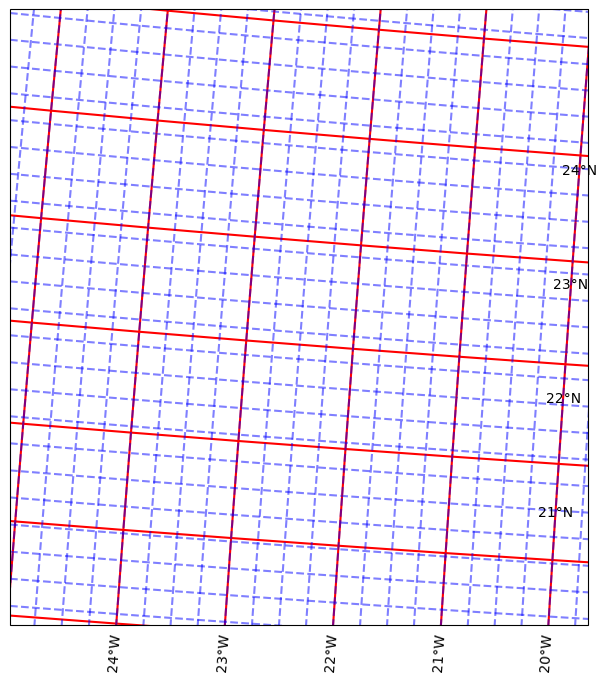

In [136]:

# Load datasets
grid_1deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_10/icegrid_nonc.nc')
grid_025deg = xr.open_mfdataset('/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_025/icegrid.nc')

# Define projection
projection = ccrs.Orthographic(central_latitude=80, central_longitude=50)
fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Stereographic())
ax.set_extent([-20, -25, 20, 25], crs=ccrs.PlateCarree())

# Function to plot grid
def plot_grid(ax, grid, color, linestyle, alpha):
    lat = grid['ulat'] * 180 / np.pi  # Convert to degrees
    lon = grid['ulon'] * 180 / np.pi  # Convert to degrees
    for i in range(lat.shape[0]):
        ax.plot(lon[i, :], lat[i, :], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())
    for j in range(lon.shape[1]):
        ax.plot(lon[:, j], lat[:, j], linestyle, color=color, alpha=alpha, transform=ccrs.PlateCarree())

# Plot 1-degree grid
plot_grid(ax, grid_1deg, 'red', '-', 1.0)

# Plot 0.25-degree grid
plot_grid(ax, grid_025deg, 'blue', '--', 0.5)

# Add coastlines and gridlines
ax.coastlines()
#ax.gridlines(draw_labels=True)
# Customize gridliner
gl = ax.gridlines(draw_labels=True, alpha=0.0)  # Set gridlines invisible
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}


plt.show()

In [137]:
# Get the top 10 lowest central pressure systems in winter over 2010-2020
def convert_filename_to_datetime(filename):
    date_time_str = filename.split('.')[1]
    date_str, seconds_str = date_time_str[:10], date_time_str[11:]
    date_part = datetime.strptime(date_str, "%Y-%m-%d")
    seconds_part = timedelta(seconds=int(seconds_str))
    return date_part + seconds_part


csv_file = '/Users/noahday/Gadi/ERA-tracks/ERA-Interim_cyclone_tracks_1979-2018_south_of_60S.csv'
df_cyclone = pd.read_csv(csv_file) 

df_cyclone.head()
index = df_cyclone[(df_cyclone['year'] < 2015)].index
df_cyclone.drop(index , inplace=True)
# REMOVE THIS NEXT LINE EVENTUALLY
index = df_cyclone[(df_cyclone['year'] > 2017)].index
df_cyclone.drop(index , inplace=True)
index = df_cyclone[(df_cyclone['month'] < 7)].index
df_cyclone.drop(index , inplace=True)
index = df_cyclone[(df_cyclone['month'] > 11)].index
df_cyclone.drop(index , inplace=True)
df_cyclone.sort_values(by=['central_pressure [hPa]']).head(10)
track_names = df_cyclone.sort_values(by=['central_pressure [hPa]']).head(100)['# track'].unique()
track_names = sorted(track_names)
track_names

[201520390,
 201520941,
 201521319,
 201521880,
 201521932,
 201522154,
 201522333,
 201523286,
 201523985,
 201524011,
 201525054,
 201526115,
 201526839,
 201527298,
 201528889,
 201622159,
 201623544,
 201624862,
 201624934,
 201625074,
 201625104,
 201625127,
 201625228,
 201625287,
 201626905,
 201627875,
 201719758,
 201719945,
 201720544,
 201724307,
 201724797,
 201725316,
 201725355,
 201725752,
 201726576]

# Sectoral analysis

From Raphael and Hobbs, GRL (2014)

![Screenshot 2024-06-06 at 9.20.53 PM.png](<attachment:Screenshot 2024-06-06 at 9.20.53 PM.png>)
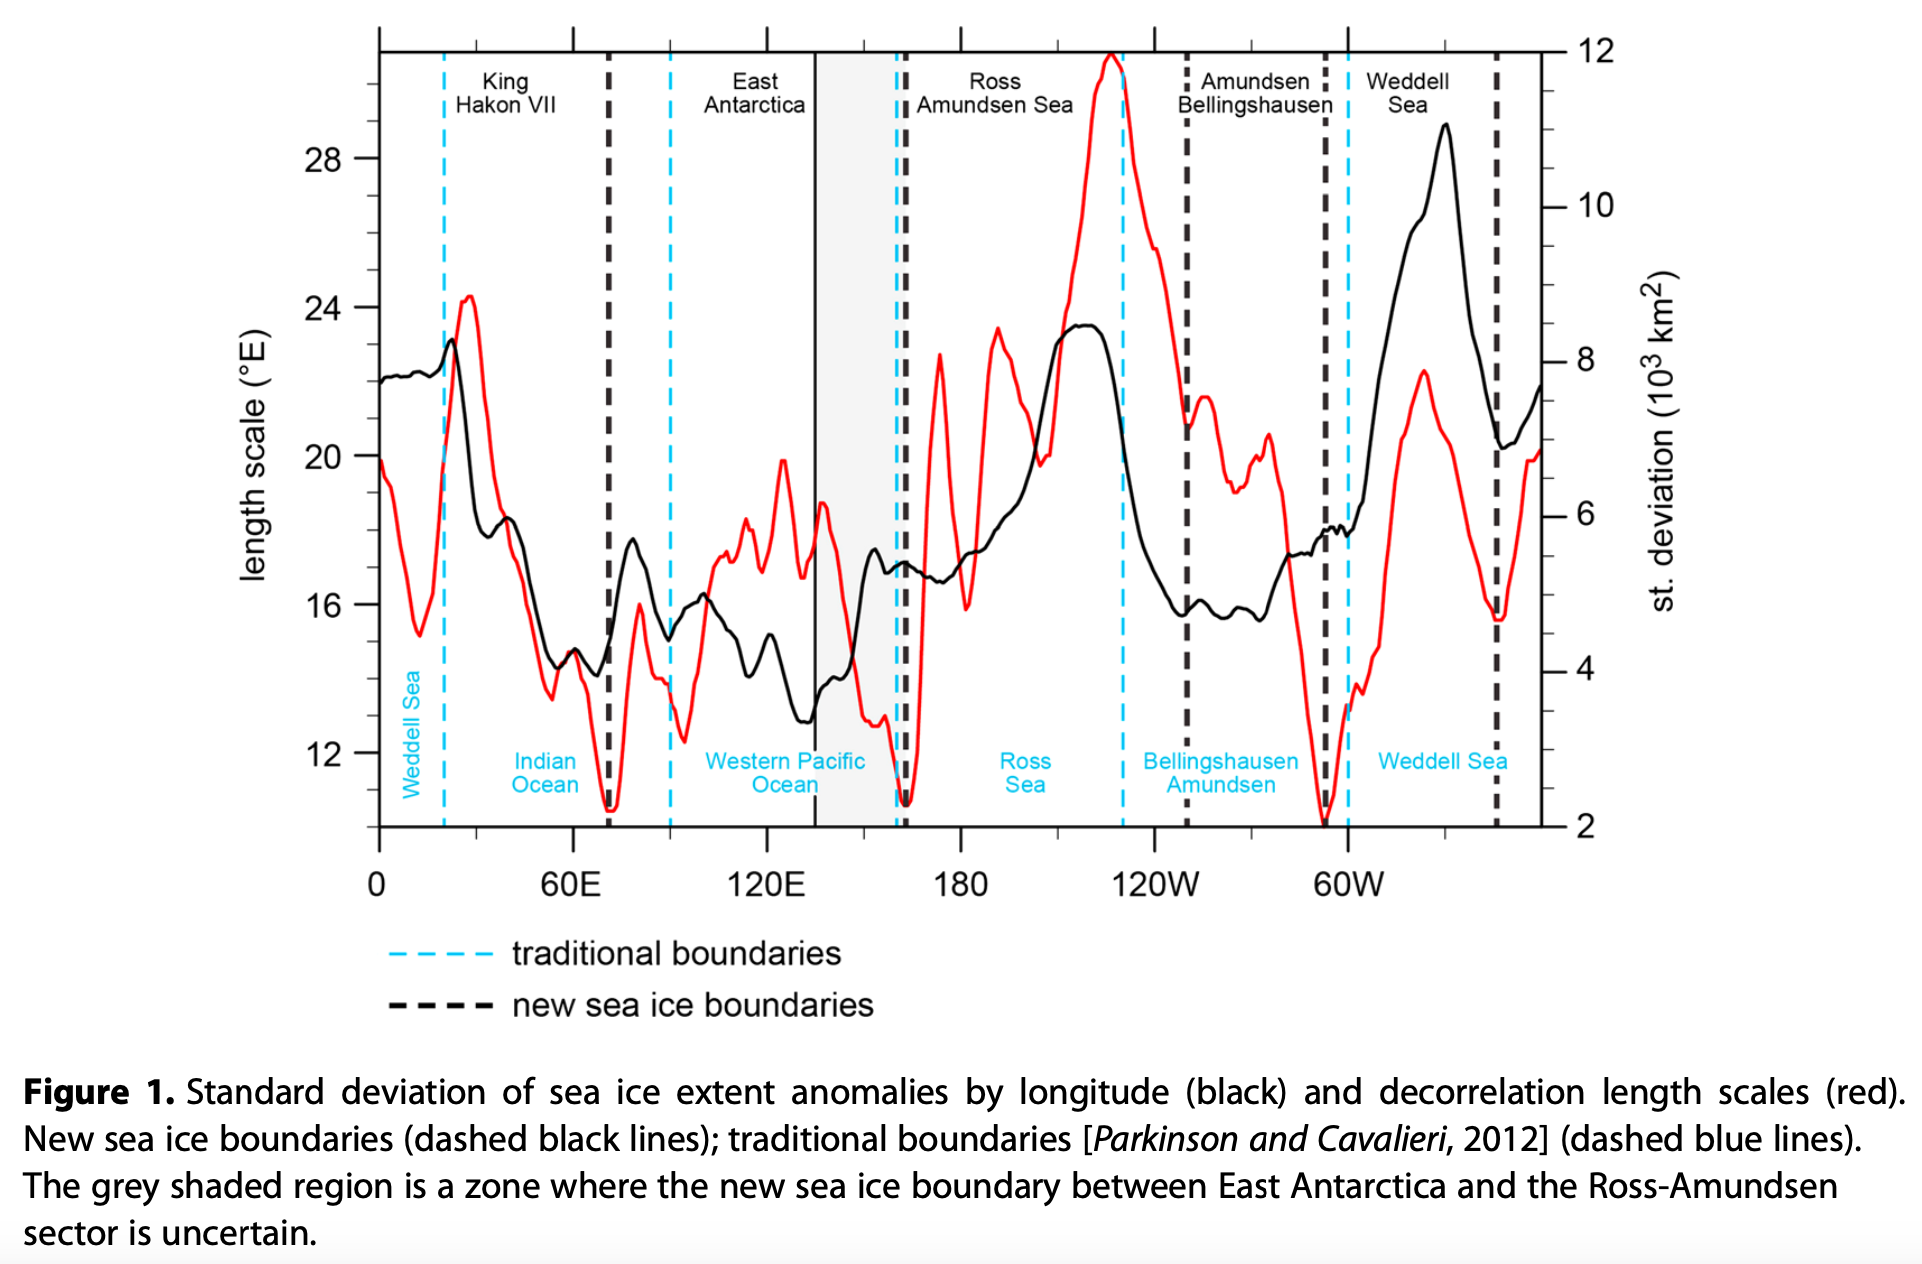

0
1
2
3
4


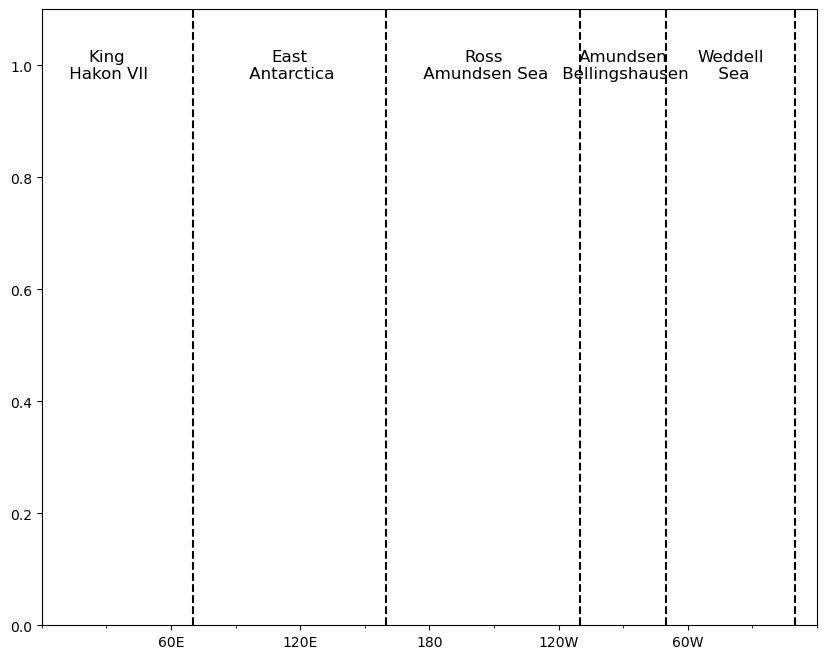

In [190]:
def cyclic_midpoint(min, max):
    if min > max:
        max += 360
    return (min + (max - min)/2)%360

fig, ax1 = plt.subplots(figsize=[10, 8])
ax1.plot()
ax1.set_xlim((0,360))
ax1.set_ylim((0,1.1))
xticks = [60, 120, 180, 240, 300]
xtick_labels = ['60E', '120E', '180', '120W', '60W']
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels)
ax1.set_xticks(range(0, 361, 30), minor=True) 
min_boundary = [350, 70, 160, 250, 290]
max_boundary = [70, 160, 250, 290, 350]
sector_label = ['King\n Hakon VII', 'East\n Antarctica', 'Ross\n Amundsen Sea', 'Amundsen\n Bellingshausen', 'Weddell\n Sea']
for i, min in enumerate(min_boundary):
    print(i)
    ax1.axvline(min, color='k', linestyle='--')
    ax1.text(cyclic_midpoint(min_boundary[i], max_boundary[i]), 1, sector_label[i], fontsize=12, ha='center', va='center')

In [191]:
# Find what sectors each track falls across and which sector it mainly is in

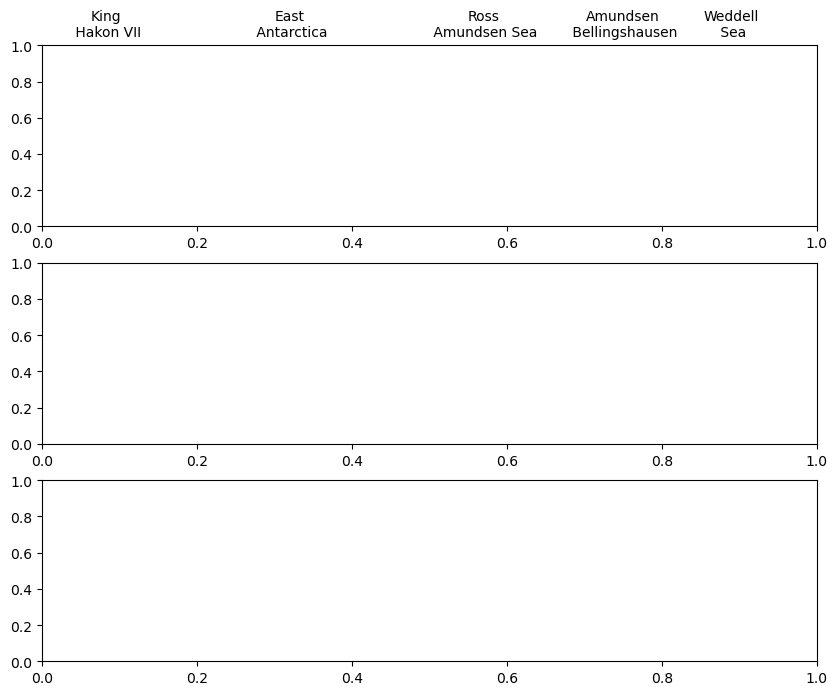

In [200]:
fig, axes = plt.subplots(3,1, figsize=[10, 8])
#ax = [add_sector_lines(ax) for ax in axes]
min_boundary = [350, 70, 160, 250, 290]
max_boundary = [70, 160, 250, 290, 350]
sector_label = ['King\n Hakon VII', 'East\n Antarctica', 'Ross\n Amundsen Sea', 'Amundsen\n Bellingshausen', 'Weddell\n Sea']
midpoints = np.zeros(len(min_boundary))
for i in range(len(min_boundary)):
    midpoints[i] = cyclic_midpoint(min_boundary[i], max_boundary[i])
for pos, label in zip(midpoints, sector_label):
    plt.text(pos/360, 1.05, label, ha='center', transform=axes[0].transAxes)


In [198]:
pos

320.0